Electronic structure calculations are critical in understanding the quantum behavior of molecules, particularly for predicting their properties and reactions. While Hartree-Fock (HF) theory provides a foundational approximation for molecular wavefunctions, it fails to capture the nuances of electron correlation—an essential aspect of accurately modeling molecular systems. To address this, Post-Hartree-Fock methods have been developed, one of the most sophisticated being Coupled-Cluster with Single and Double excitations (CCSD).

CCSD builds upon the HF method by systematically incorporating electron correlation effects. In HF theory, electrons are considered independent, moving in an average field created by other electrons. This approximation neglects the dynamic interaction between electrons, which is vital for precision in electronic structure calculations. CCSD extends this framework by including excitations from the reference Hartree-Fock wavefunction, accounting for interactions between occupied and virtual orbitals. Specifically, CCSD accounts for single (S) and double (D) excitations, which model electrons transitioning between states in pairs, ensuring that correlated electron movements are captured in the wavefunction.

The mathematical underpinning of CCSD relies on the exponential ansatz, which expresses the correlated wavefunction as an exponential function of excitation operators acting on the Hartree-Fock reference wavefunction. The coupled-cluster equations are derived from the Schrödinger equation and solved iteratively to find the best approximation to the true wavefunction. One of the key advantages of CCSD is that it incorporates a large portion of electron correlation while maintaining computational tractability for systems of modest size.

Despite its significant advantages, CCSD is not without limitations. The computational cost grows steeply with the size of the molecular system, making it infeasible for large molecules or systems with many electrons. Nevertheless, the accuracy of CCSD makes it invaluable for small- to medium-sized molecular systems, particularly in fields such as quantum chemistry, material science, and drug discovery, where precise modeling of molecular properties is critical.

Looking forward, advancements in quantum computing offer a promising avenue to mitigate the computational challenges associated with CCSD. Quantum algorithms for simulating electronic structure, such as the Quantum Phase Estimation (QPE) algorithm or the Variational Quantum Eigensolver (VQE), have the potential to accelerate the solution of coupled-cluster equations on quantum hardware. This could enable researchers to apply CCSD-level accuracy to larger and more complex systems that are currently beyond the reach of classical computers.

In conclusion, CCSD is a cornerstone in the realm of Post-Hartree-Fock methods, providing a sophisticated yet computationally feasible approach to capturing electron correlation in molecular systems. As quantum computing technology continues to mature, the possibility of extending these calculations to larger systems holds exciting prospects for the future of quantum chemistry and related fields.

### Coupled-Cluster Energy Formula (CCSD)

The total energy of a system in the Coupled Cluster Singles and Doubles (CCSD) method is given by:

$$
E_{CCSD} = \langle \Phi_0 | \hat{H} e^{\hat{T}_1 + \hat{T}_2} | \Phi_0 \rangle
$$

where:

- $\hat{H}$ is the electronic Hamiltonian,
- $\hat{T}_1$ and $\hat{T}_2$ are the cluster operators corresponding to single and double excitations, respectively,
- $\Phi_0$ is the reference Hartree-Fock wavefunction.

The operators $\hat{T}_1$ and $\hat{T}_2$ are defined as:

$$
\hat{T}_1 = \sum_{ia} t_i^a \hat{a}_a^\dagger \hat{a}_i
$$

$$
\hat{T}_2 = \frac{1}{4} \sum_{ijab} t_{ij}^{ab} \hat{a}_a^\dagger \hat{a}_b^\dagger \hat{a}_i \hat{a}_j
$$

where:

- $t_i^a$ are the single excitation amplitudes,
- $t_{ij}^{ab}$ are the double excitation amplitudes,
- $\hat{a}_i, \hat{a}_j$ are annihilation operators for occupied orbitals, and $\hat{a}_a^\dagger, \hat{a}_b^\dagger$ are creation operators for virtual orbitals.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator  # New Estimator class
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Define the H2 molecular Hamiltonian manually, ensuring all terms act on 2 qubits
pauli_dict = {
    "XX": -0.5,   # XX on qubits 0 and 1
    "YY": -0.5,   # YY on qubits 0 and 1
    "ZZ": 0.6,    # ZZ on qubits 0 and 1
    "II": -1.0    # Identity on both qubits
}

In [3]:
# Construct the Hamiltonian using SparsePauliOp
hamiltonian = SparsePauliOp.from_list([(key, value) for key, value in pauli_dict.items()])

In [4]:
# Initialize the quantum circuit using EfficientSU2 for the UCCSD approximation
num_qubits = 2
ansatz = EfficientSU2(num_qubits, reps=2)

In [5]:
# Set up the VQE algorithm with the COBYLA optimizer
optimizer = COBYLA(maxiter=200)
backend = AerSimulator()

In [6]:
# Set up the Estimator primitive, required by the VQE algorithm
estimator = Estimator()

In [7]:
# Set up the VQE algorithm using the Estimator
vqe = VQE(estimator, ansatz, optimizer)

In [8]:
# Run VQE to find the minimum eigenvalue (ground state energy)
result = vqe.compute_minimum_eigenvalue(hamiltonian)
print(f"Ground state energy: {result.eigenvalue.real}")

Ground state energy: -2.599857566813046


In [9]:
# Transpile the quantum circuit for the Aer simulator
qc = transpile(ansatz, backend)

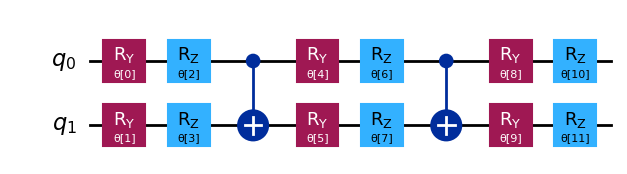

In [10]:
# Draw circuit
qc.draw(output='mpl')
plt.show()

